In [1]:
t_delta = 0.01

# Golden dynamics visualization

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)
import RLConn as rc
from RLConn import problem_definitions as problems
from RLConn import connectome_utils as connectome_utils

problem = problems.FOUR_NEURON_OSCILLATION
m1_target = problem.m1_target
m2_target = problem.m2_target

/home/stephen/anaconda3/envs/rlconn-env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stephen/anaconda3/envs/rlconn-env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stephen/anaconda3/envs/rlconn-env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/stephen/anaconda3/envs/rl




Instructions for updating:
Use keras.layers.dense instead.


/home/stephen/anaconda3/envs/rlconn-env/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/stephen/anaconda3/envs/rlconn-env/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/stephen/anaconda3/envs/rlconn-env/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/step

In [3]:
print("Shapes of m1 and m2: %s, %s" % (m1_target.shape, m2_target.shape))

Shapes of m1 and m2: (500,), (500,)


Text(0.5, 0.98, 'Golden dynamics')

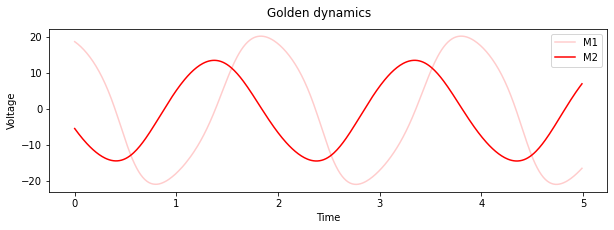

In [4]:
num_timesamples = m1_target.shape[0]

timepoints = np.arange(0, num_timesamples * t_delta, t_delta)
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(timepoints, m1_target, label="M1", c ="red", alpha =0.2)
ax.plot(timepoints, m2_target, label="M2", c ="red", alpha= 1.0)
ax.set_xlabel("Time")
ax.set_ylabel("Voltage")
ax.legend()
fig.suptitle("Golden dynamics")

# Initial unoptimized connectome

Using the default neural parameters
Accepted the custom connectivity
All neurons are healthy
Network integration prep completed...
Computing network dynamics...
Mean error = 41.1595, Summed error  = 20579.7566


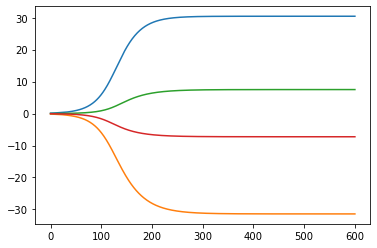

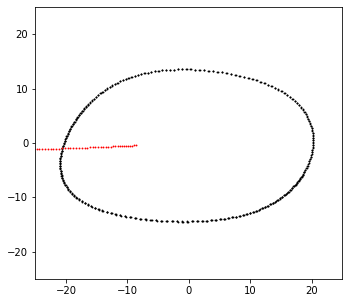

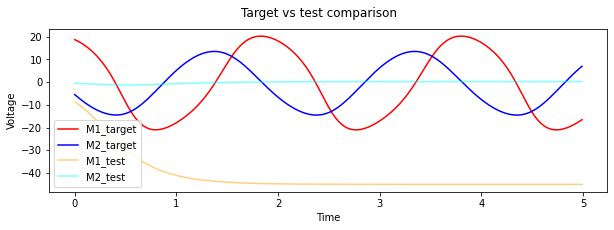

In [5]:
initial_network = connectome_utils.generate_random_network(
  N = problem.N,
  n_inhibitory = 1,
  max_degree = 15)
initial_Gg = initial_network['gap']
initial_Gs = initial_network['syn']

mean_err, summed_err = rc.utils.compute_problem_score(initial_Gg, initial_Gs,
                                                        problems.FOUR_NEURON_OSCILLATION, verbose=False)
print("Mean error = %.4f, Summed error  = %.4f" % (mean_err, summed_err))